# E14 - Chi-squared ($\chi^2$) Distribution: PDF/CDF Plots, Quantiles, and Moments

## 1. Theoretical Foundation

Before writing the code, let's understand the Chi-squared ($\chi^2$) distribution. This distribution is vital in statistical inference, forming the basis for tests involving categorical data and, most relevant to dependability and performance analysis, for constructing confidence intervals for the variance of a population.

### What is the $\chi^2$ distribution?

The **Chi-squared distribution** is a family of continuous probability distributions. A $\chi^2$ variable is constructed from the sum of the squares of independent standard normal random variables. If $Z_1, Z_2, \ldots, Z_\nu$ are $\nu$ independent random variables, each following the standard normal distribution, then the sum of their squares:

$$ X = \sum_{i=1}^{\nu} Z_i^2 $$

follows a Chi-squared distribution with $\nu$ **degrees of freedom**, denoted as $X \sim \chi_\nu^2$.

### Key Concepts:

* **Degrees of Freedom ($\nu$)**: Similar to the t-distribution, this parameter defines the specific shape of the $\chi^2$ distribution. It represents the number of independent standard normal variables being summed. Unlike the normal and t-distributions, the $\chi^2$ distribution is **not symmetric**. It is skewed to the right. As $\nu$ increases, the distribution becomes more symmetric and approaches a normal distribution.

* **Probability Density Function (PDF)**: The PDF of a $\chi^2$ distribution is defined only for positive values ($x > 0$), as it is the sum of squares. Its shape is highly dependent on $\nu$. For small $\nu$, it is heavily skewed right. We will visualize this in part (a).

* **Moments (Mean and Variance)**: The moments of the $\chi^2$ distribution are remarkably simple and directly related to its degrees of freedom, which is a key property we'll use.
    * **Mean**: $E[X] = \nu$
    * **Variance**: $Var(X) = 2\nu$
    We will annotate our PDF plots with these values to see how the center and spread of the distribution change with $\nu$.

* **Cumulative Distribution Function (CDF)**: The CDF, $F(x)$, gives the probability $P(X \le x)$. We will use its inverse (the quantile function) to find critical values, such as the 95th percentile ($q_{0.95}$), which are essential for creating confidence intervals for the population standard deviation (as seen in E8).

### Why is it important in Dependability?

In performance evaluation and reliability engineering, understanding and controlling variability is often as important as analyzing the average performance. Is the system's response time consistent? How much does the network latency fluctuate? Questions like these are answered by analyzing the variance. The $\chi^2$ distribution is the theoretical tool that allows us to move from a *sample* variance ($s^2$) to an inference about the *population* variance ($\sigma^2$). This exercise will build our intuition about the shape and properties of this essential distribution.

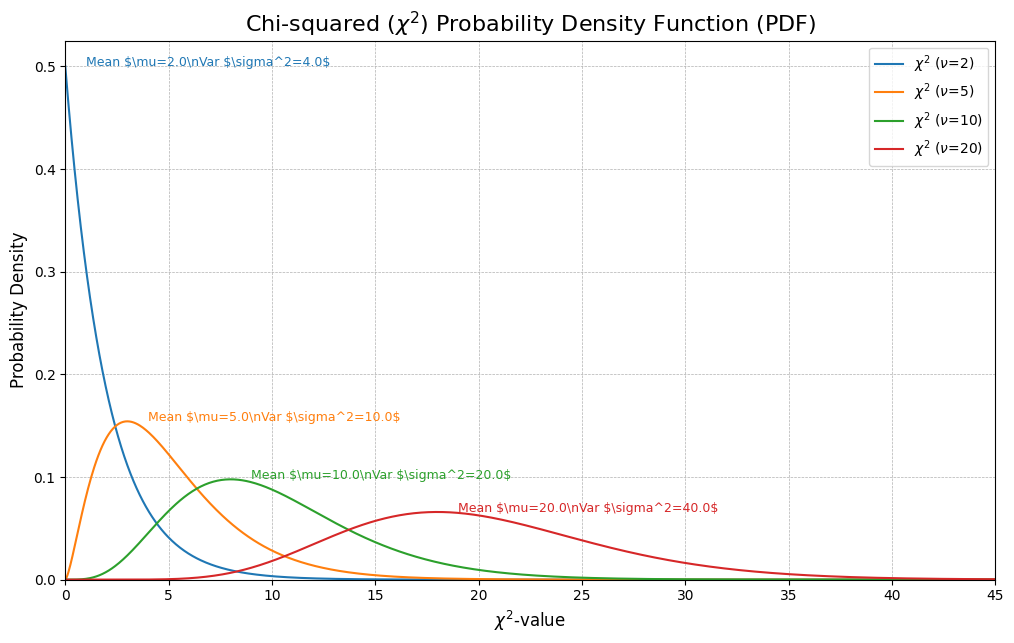

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# --- Setup ---
dof = [2, 5, 10, 20]
x = np.linspace(0, 50, 1000)

# --- Plotting the Probability Density Function (PDF) ---
plt.figure(figsize=(12, 7))

for df in dof:
    mean = chi2.mean(df)
    var = chi2.var(df)
    pdf_values = chi2.pdf(x, df)
    
    # Using an 'fr-string' for formatted raw string
    line, = plt.plot(x, pdf_values, label=fr'$\chi^2$ ($\nu$={df})')
    
    # Using an 'fr-string' here as well
    peak_y_pos = np.max(pdf_values)
    peak_x_pos = x[np.argmax(pdf_values)]
    plt.text(peak_x_pos + 1, peak_y_pos, fr'Mean $\mu={mean}\nVar $\sigma^2={var}$', 
             color=line.get_color(), fontsize=9)

# --- Formatting the plot with raw strings (r"...") ---
plt.title(r"Chi-squared ($\chi^2$) Probability Density Function (PDF)", fontsize=16)
plt.xlabel(r"$\chi^2$-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.xlim(left=0, right=45)

plt.show()

### Analysis of the PDF Plot

The plot vividly shows the properties of the $\chi^2$ distribution.

* **Shape and Skewness**: For low degrees of freedom ($\nu=2$, $\nu=5$), the distribution is highly skewed to the right. As $\nu$ increases to 20, the skewness reduces, and the shape begins to resemble a bell curve, illustrating its convergence towards normality.
* **Mean and Variance**: The annotations show how the distribution shifts and spreads out as $\nu$ increases. The mean ($\nu$) dictates the center of the distribution, which moves to the right. The variance ($2\nu$) controls the spread, which also increases with $\nu$, making the curves wider and flatter.

Approximate median for df=2: 1.39
Approximate median for df=5: 4.35
Approximate median for df=10: 9.34
Approximate median for df=20: 19.34


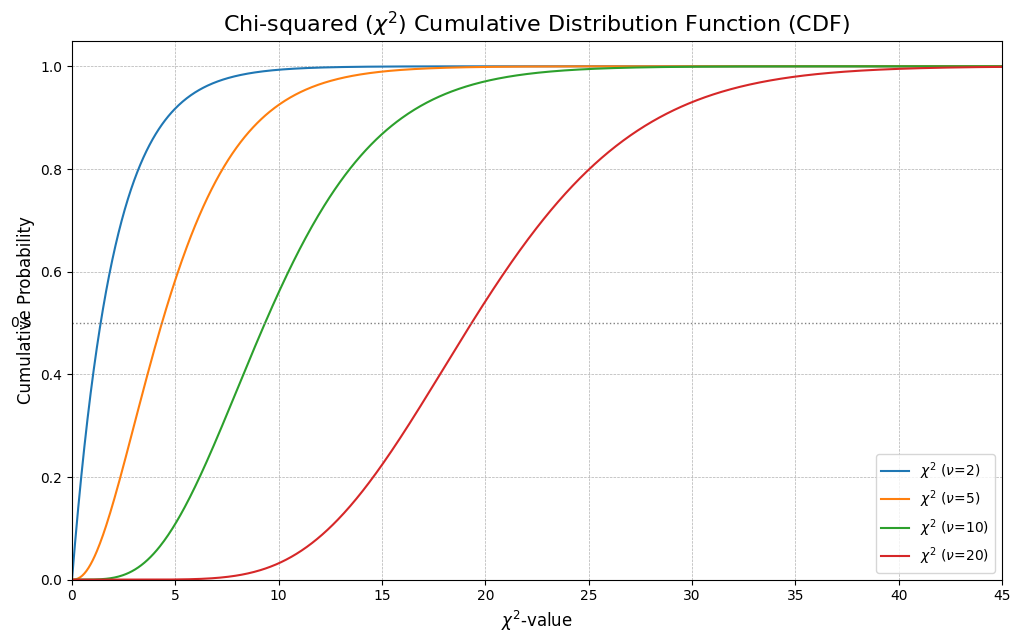

In [9]:
# --- Part (b): Plotting the Cumulative Distribution Function (CDF) ---
plt.figure(figsize=(12, 7))

# Plot the chi-squared CDF for each degree of freedom
for df in dof:
    cdf_values = chi2.cdf(x, df)
    plt.plot(x, cdf_values, label=f'$\\chi^2$ ($\\nu$={df})')
    
    # Approximate the median from the CDF
    median_approx = np.interp(0.5, cdf_values, x)
    print(f"Approximate median for df={df}: {median_approx:.2f}")

# --- Formatting the plot ---
plt.title(r"Chi-squared ($\chi^2$) Cumulative Distribution Function (CDF)", fontsize=16)
plt.xlabel(r"$\chi^2$-value", fontsize=12)
plt.ylabel(r"Cumulative Probability", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(left=0, right=45)
plt.ylim(0, 1.05)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1) # Line for the median
plt.text(-3, 0.5, '0.5', verticalalignment='center')


plt.show()

### Analysis of the CDF Plot

The CDF plot shows the cumulative probability. We can see that for any given $\chi^2$ value on the x-axis, a distribution with fewer degrees of freedom accumulates probability faster initially. The approximate medians printed above show that the median (the 50th percentile) is always slightly less than the mean ($\nu$), which is a direct consequence of the right skewness of the distribution.


--- Quantiles and Tail Probabilities for p = 0.95 ---
For df=2 , the 95th percentile (q_0.95) is  5.991
  -> P(X > 5.991) = 0.05000 (confirms it is 1 - 0.95)
For df=5 , the 95th percentile (q_0.95) is 11.070
  -> P(X > 11.070) = 0.05000 (confirms it is 1 - 0.95)
For df=10, the 95th percentile (q_0.95) is 18.307
  -> P(X > 18.307) = 0.05000 (confirms it is 1 - 0.95)
For df=20, the 95th percentile (q_0.95) is 31.410
  -> P(X > 31.410) = 0.05000 (confirms it is 1 - 0.95)


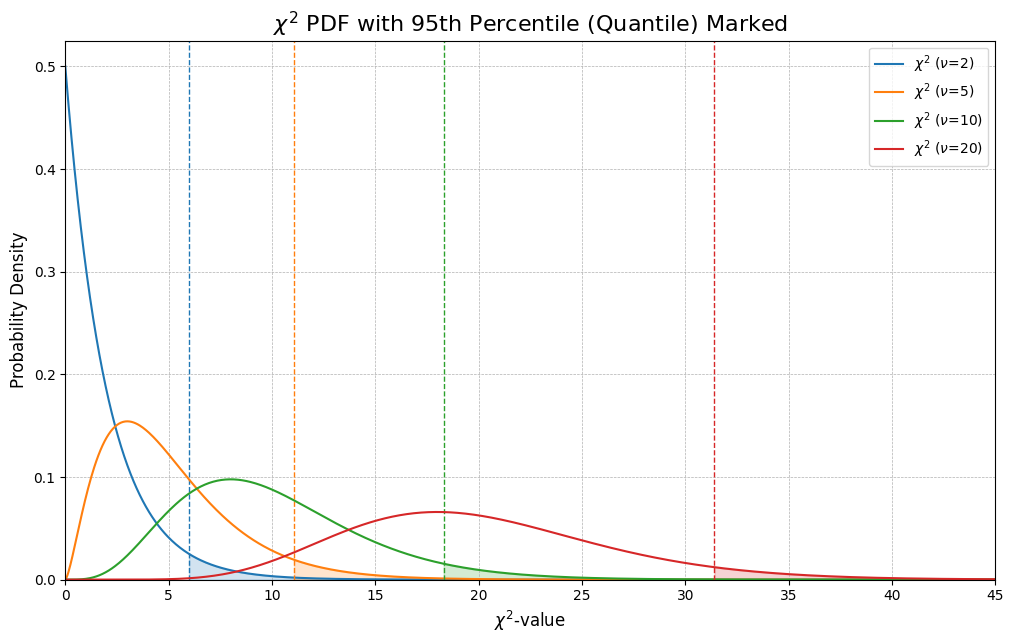

In [10]:
# --- Part (c) and (d): Quantiles and Tail Probabilities ---

# Target probability for the 95th percentile
p_quantile = 0.95

print(f"\n--- Quantiles and Tail Probabilities for p = {p_quantile} ---")

plt.figure(figsize=(12, 7))

# We will reuse the PDF plot to mark the quantiles
for df in dof:
    # Plot the PDF again
    pdf_values = chi2.pdf(x, df)
    line, = plt.plot(x, pdf_values, label=f'$\\chi^2$ ($\\nu$={df})')
    
    # (c) Compute the 95th percentile (quantile)
    q95 = chi2.ppf(p_quantile, df)
    print(f"For df={df:<2}, the 95th percentile (q_0.95) is {q95:>6.3f}")
    
    # Mark the quantile on the PDF plot
    plt.axvline(x=q95, color=line.get_color(), linestyle='--', linewidth=1)
    # Fill the tail area
    x_fill = np.linspace(q95, 50, 500)
    plt.fill_between(x_fill, chi2.pdf(x_fill, df), color=line.get_color(), alpha=0.2)
    
    # (d) Confirm the tail probability
    # The probability of X > q is 1 - P(X <= q) = 1 - CDF(q)
    tail_prob = 1 - chi2.cdf(q95, df)
    print(f"  -> P(X > {q95:.3f}) = {tail_prob:.5f} (confirms it is 1 - {p_quantile})")

# --- Formatting the plot ---
plt.title(r"$\chi^2$ PDF with 95th Percentile (Quantile) Marked", fontsize=16)
plt.xlabel(r"$\chi^2$-value", fontsize=12)
plt.ylabel(r"Probability Density", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.xlim(left=0, right=45)

plt.show()

### Analysis of Quantiles and Tail Probabilities

This final part numerically and visually confirms our understanding.

* **Quantiles**: The calculated 95th percentiles ($q_{0.95}$) are the critical values we would use, for example, in constructing a confidence interval. The vertical dashed lines on the plot mark these points for each distribution.
* **Right Tail**: The exercise asks us to describe how the right tail changes with $\nu$. As $\nu$ increases, the 95th percentile moves further to the right. This is intuitive: as the distribution's mean ($\nu$) and variance ($2\nu$) increase, the entire distribution shifts right and spreads out, so its quantiles naturally move to higher values as well.
* **Tail Probability**: Our calculations confirm, up to numerical precision, that the area to the right of the 95th percentile is indeed 0.05. This demonstrates the inverse relationship between the CDF (and its inverse, the PPF or quantile function) and the tail probability. This is the mechanism we use to find critical values for statistical tests.

This exploration gives us a solid, practical feel for the $\chi^2$ distribution, which is essential for tackling problems involving variance estimation.